In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from scipy import signal

In [2]:
# ------------------------------
# A1. Load and Preprocess Dataset
# ------------------------------
data_dir = "drownsiness_dataset"  # Update with correct path
img_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


In [3]:
# ------------------------------
# A2. Design and Train CNN Model
# ------------------------------
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)


C:\Users\venka\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\venka\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 281s 230ms/step - accuracy: 0.8733 - loss: 0.2791 - val_accuracy: 0.9398 - val_loss: 0.1949
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 273s 227ms/step - accuracy: 0.9701 - loss: 0.0831 - val_accuracy: 0.9415 - val_loss: 0.1996
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 280s 233ms/step - accuracy: 0.9832 - loss: 0.0511 - val_accuracy: 0.9318 - val_loss: 0.2216
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 281s 233ms/step - accuracy: 0.9867 - loss: 0.0399 - val_accuracy: 0.9123 - val_loss: 0.3178
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 282s 235ms/step - accuracy: 0.9892 - loss: 0.0325 - val_accuracy: 0.9055 - val_loss: 0.2502
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 269s 224ms/step - accuracy: 0.9914 - loss: 0.0286 - val_accuracy: 0.8970 - val_loss: 0.4088
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 275s 229ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.8843 - val_loss: 0.3635
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 236s 196ms/step - accuracy: 0.9

In [4]:
# ------------------------------
# A3. Evaluate Model Performance
# ------------------------------
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.9172 - loss: 0.3332
Validation Accuracy: 91.39%


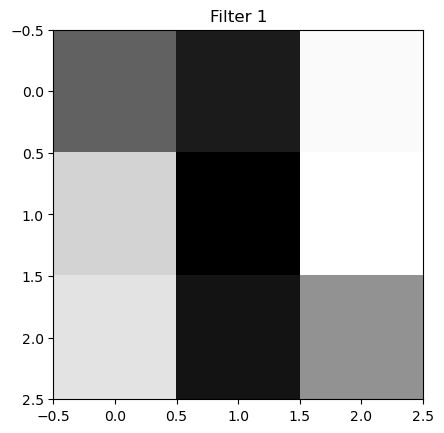

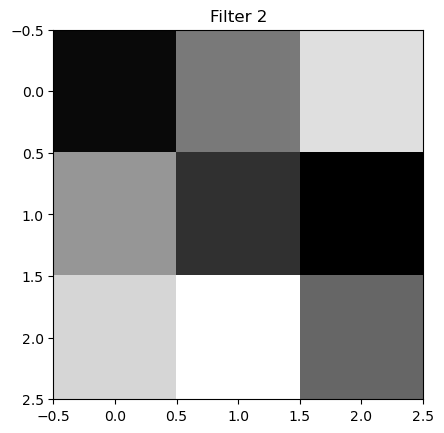

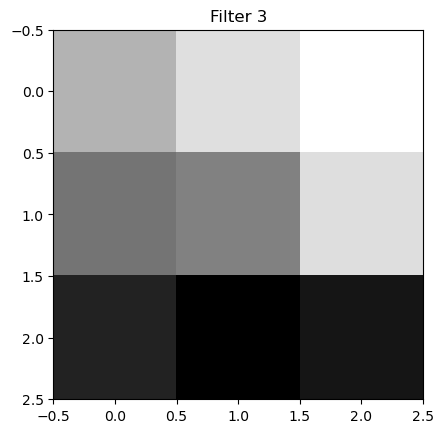

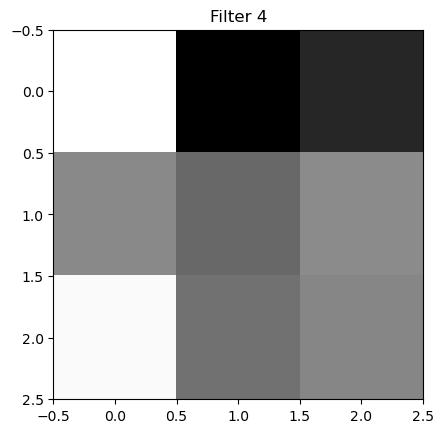

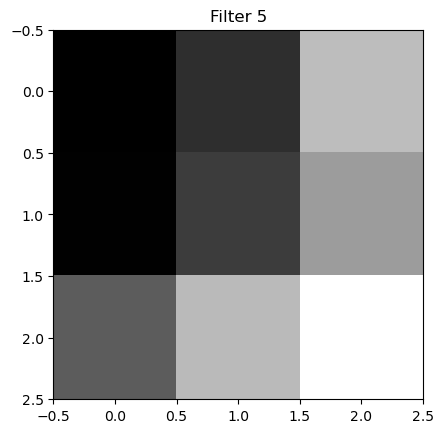

In [5]:
# ------------------------------
# A4. Inspect CNN Filters
# ------------------------------
filters, biases = model.layers[0].get_weights()

for i in range(5):
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.title(f'Filter {i+1}')
    plt.show()

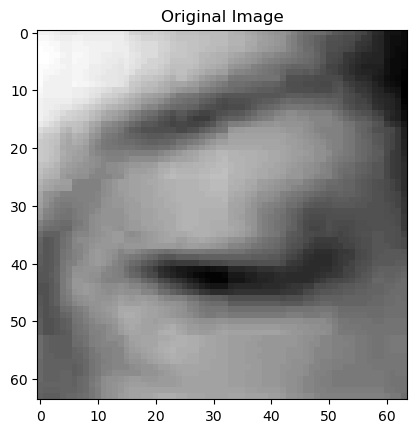

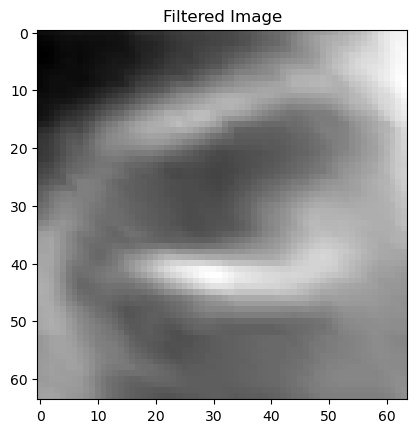

In [10]:
# ------------------------------
# A5. Apply Filter on Image
# ------------------------------
sample_img, _ = next(train_generator)
img = sample_img[0, :, :, 0]  # Extract first grayscale image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()

filtered_img = signal.convolve2d(img, filters[:, :, 0, 1], boundary='symm', mode='same')
plt.imshow(filtered_img, cmap='gray')
plt.title("Filtered Image")
plt.show()


In [12]:
# ------------------------------
# A6. Design Fully Connected Neural Network (Dense Network)
# ------------------------------
model_fc = keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_fc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_fc = model_fc.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


C:\Users\venka\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.8262 - loss: 0.4182 - val_accuracy: 0.9035 - val_loss: 0.2860
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.8966 - loss: 0.2777 - val_accuracy: 0.8756 - val_loss: 0.3206
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.9111 - loss: 0.2392 - val_accuracy: 0.9320 - val_loss: 0.2010
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 63s 52ms/step - accuracy: 0.9225 - loss: 0.2143 - val_accuracy: 0.9098 - val_loss: 0.2581
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 65s 54ms/step - accuracy: 0.9317 - loss: 0.1922 - val_accuracy: 0.8973 - val_loss: 0.2647
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 66s 55ms/step - accuracy: 0.9352 - loss: 0.1771 - val_accuracy: 0.9019 - val_loss: 0.2336
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 67s 55ms/step - accuracy: 0.9374 - loss: 0.1688 - val_accuracy: 0.9318 - val_loss: 0.1786
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 65s 54ms/step - accuracy: 0.9415 - loss: 0.16

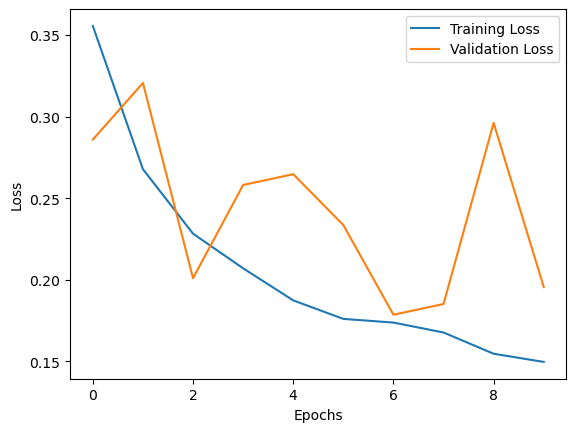

In [13]:
# ------------------------------
# A7. Plot Training and Validation Loss
# ------------------------------
plt.plot(history_fc.history['loss'], label='Training Loss')
plt.plot(history_fc.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# ------------------------------
# A8. Test and Evaluate the Model
# ------------------------------
loss_fc, accuracy_fc = model_fc.evaluate(val_generator)
print(f"Dense Model Validation Accuracy: {accuracy_fc * 100:.2f}%")

300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9303 - loss: 0.1923
Dense Model Validation Accuracy: 92.96%
